In [1]:
import os
from glob import glob
import time
import datetime
import csv
import matplotlib
import pandas as pd

# 指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
# 解决负号’-‘显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False

In [65]:
path = r'C:\Documents\Heroes of the Storm\Accounts\213079079\5-Hero-1-269050\Replays\Multiplayer'
file_list = glob(f'{path}\*')
# for i in file_list:
#     print(i)
# print(file_list)

In [2]:
'''把时间戳转化为时间: 1479264792 to 2016-11-16 10:53:12'''


def TimeStampToTime(timestamp):
    timeStruct = time.localtime(timestamp)
    return time.strftime('%Y-%m-%d %H:%M:%S', timeStruct)


'''获取文件的大小,结果保留两位小数，单位为KB'''


def get_FileSize(filePath):
    fsize = os.path.getsize(filePath)
    fsize = fsize / float(1024)
    return round(fsize, 2)


'''获取文件的访问时间'''


def get_FileAccessTime(filePath):
    t = os.path.getatime(filePath)
    return TimeStampToTime(t)


'''获取文件的创建时间'''


def get_FileCreateTime(filePath):
    t = os.path.getctime(filePath)
    return TimeStampToTime(t)


'''获取文件的修改时间'''


def get_FileModifyTime(filePath):
    t = os.path.getmtime(filePath)
    return TimeStampToTime(t)


def get_FileName(filePath):
    n = os.path.splitext(filePath)[0]
    n = os.path.basename(n)
    return n

In [68]:
csvfile = open("HoS_replay.csv", "w", encoding='utf-8')
writer = csv.writer(csvfile)
# 先写入columns_name
writer.writerow(
    ["file_name", "file_path", "create_time", "modify_time", "access_time"])

for p in file_list:
    fn = get_FileName(p)
    ct = get_FileCreateTime(p)
    mt = get_FileModifyTime(p)
    at = get_FileAccessTime(p)
    writer.writerow([fn, p, ct, mt, at])

csvfile.close()

In [105]:
game_info = pd.read_csv('HoS_replay.csv', parse_dates=True)
game_info.head()

,file_name,file_path,create_time,modify_time,access_time
0,2020-07-29 22.07.18 沃斯卡娅铸造厂,C:\Documents\Heroes of the Storm\Accounts\2130...,2020-12-15 14:25:54,2020-07-29 22:07:18,2021-09-15 09:34:52
1,2020-07-29 22.31.07 沃斯卡娅铸造厂,C:\Documents\Heroes of the Storm\Accounts\2130...,2020-12-15 12:59:25,2020-07-29 22:31:08,2021-09-15 09:34:52
2,2020-07-29 22.50.21 恐魔园,C:\Documents\Heroes of the Storm\Accounts\2130...,2020-12-15 17:07:41,2020-07-29 22:50:22,2021-09-15 09:34:45
3,2020-09-02 22.01.09 布莱克西斯禁区,C:\Documents\Heroes of the Storm\Accounts\2130...,2020-12-15 15:49:00,2020-09-02 22:01:10,2021-09-15 09:34:52
4,2020-09-02 22.18.32 弹头枢纽站,C:\Documents\Heroes of the Storm\Accounts\2130...,2020-12-15 13:24:36,2020-09-02 22:18:33,2021-09-15 09:34:51


In [106]:
game_info['area'] = game_info['file_name'].str.extract(r'([\u4e00-\u9fa5]+)')

In [107]:
game_info['create_time'] = pd.to_datetime(game_info['create_time'])
game_info['modify_time'] = pd.to_datetime(game_info['modify_time'])
game_info['access_time'] = pd.to_datetime(game_info['access_time'])

In [108]:
game_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   file_name    1547 non-null   object        
 1   file_path    1547 non-null   object        
 2   create_time  1547 non-null   datetime64[ns]
 3   modify_time  1547 non-null   datetime64[ns]
 4   access_time  1547 non-null   datetime64[ns]
 5   area         1547 non-null   object        
dtypes: datetime64[ns](3), object(3)
memory usage: 72.6+ KB


In [109]:
game_info['create_date'] = game_info['create_time'].dt.date
game_info['modify_date'] = game_info['modify_time'].dt.date
game_info['access_date'] = game_info['access_time'].dt.date
game_info['modify_ym'] = game_info['modify_time'].dt.strftime('%Y-%m')

<AxesSubplot:xlabel='area'>

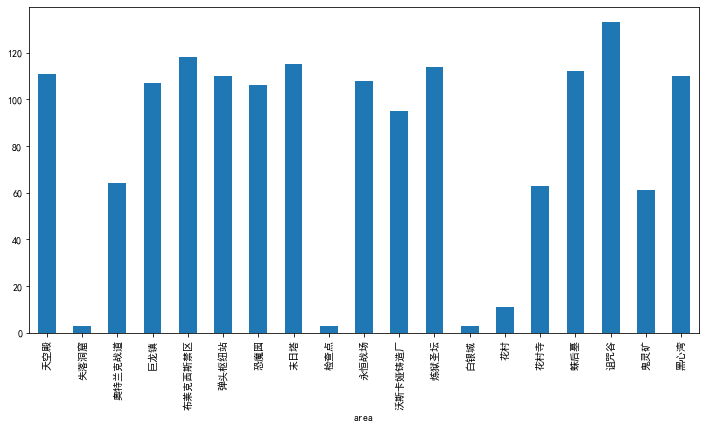

In [110]:
game_info.groupby('area')['file_name'].count().plot.bar(figsize=(12, 6))

<AxesSubplot:xlabel='modify_ym'>

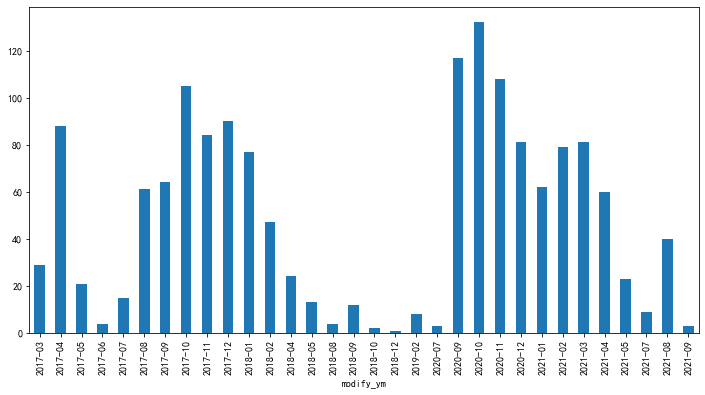

In [111]:
game_info.groupby('modify_ym')['file_name'].count().plot.bar(figsize=(12, 6))

In [3]:
path2 = r'C:\Documents\StarCraft II\Accounts\213079079\5-S2-1-4501899\Replays\Multiplayer'
file_list2 = glob(f'{path2}\*')

In [4]:
csvfile = open("SC_replay.csv", "w", encoding='utf-8')
writer = csv.writer(csvfile)
# 先写入columns_name
writer.writerow(
    ["file_name", "file_path", "create_time", "modify_time", "access_time"])

for p in file_list2:
    fn = get_FileName(p)
    ct = get_FileCreateTime(p)
    mt = get_FileModifyTime(p)
    at = get_FileAccessTime(p)
    writer.writerow([fn, p, ct, mt, at])

csvfile.close()

In [5]:
game_replay = pd.read_csv('SC_replay.csv', parse_dates=True)
game_replay.head()

,file_name,file_path,create_time,modify_time,access_time
0,亡者之夜 (10),C:\Documents\StarCraft II\Accounts\213079079\5...,2020-12-15 17:24:23,2018-09-30 19:38:46,2021-09-15 09:34:32
1,亡者之夜 (11),C:\Documents\StarCraft II\Accounts\213079079\5...,2020-12-16 09:08:33,2018-10-02 20:10:11,2021-09-15 09:34:32
2,亡者之夜 (12),C:\Documents\StarCraft II\Accounts\213079079\5...,2020-12-15 13:58:09,2018-10-04 23:30:15,2021-09-15 09:34:32
3,亡者之夜 (13),C:\Documents\StarCraft II\Accounts\213079079\5...,2020-12-15 13:37:23,2018-10-21 17:50:29,2021-09-15 09:34:32
4,亡者之夜 (14),C:\Documents\StarCraft II\Accounts\213079079\5...,2020-12-15 14:51:48,2018-11-04 12:00:32,2021-09-15 09:34:32


In [7]:
game_replay['area'] = game_replay['file_name'].str.extract(r'([\u4e00-\u9fa5]+)')

game_replay['create_time'] = pd.to_datetime(game_replay['create_time'])
game_replay['modify_time'] = pd.to_datetime(game_replay['modify_time'])
game_replay['access_time'] = pd.to_datetime(game_replay['access_time'])

game_replay['create_date'] = game_replay['create_time'].dt.date
game_replay['modify_date'] = game_replay['modify_time'].dt.date
game_replay['access_date'] = game_replay['access_time'].dt.date
game_replay['modify_ym'] = game_replay['modify_time'].dt.strftime('%Y-%m')

<AxesSubplot:xlabel='area'>

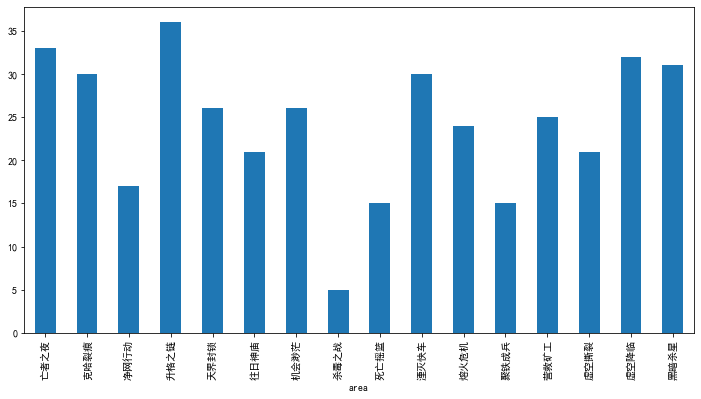

In [8]:
game_replay.groupby('area')['file_name'].count().plot.bar(figsize=(12, 6))

<AxesSubplot:xlabel='modify_ym'>

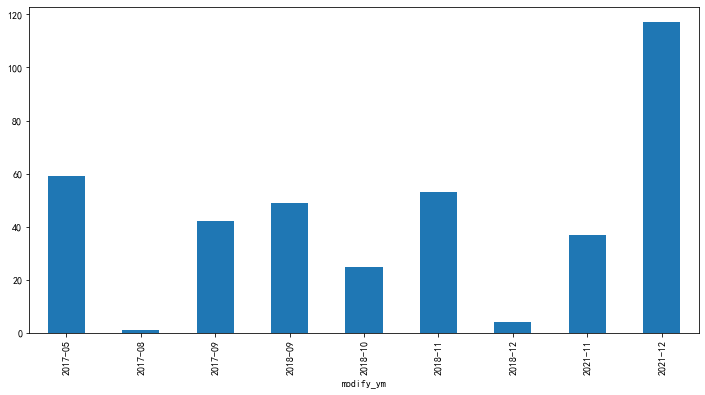

In [9]:
game_replay.groupby('modify_ym')['file_name'].count().plot.bar(figsize=(12, 6))